In [1]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
from tqdm.auto import tqdm
tqdm.pandas()
from bs4 import BeautifulSoup, Comment

In [2]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [3]:
initial_tweet_path = 'OnlineKhabar_En/tweets.csv'
file_path = "OnlineKhabar_En.csv"
result_file_path = "OnlineKhabar_En_articles.csv"

In [4]:
df = pd.read_csv(initial_tweet_path, usecols=['id', 'created_at', 'urls'], parse_dates=['created_at'])

In [5]:
list(df)

['id', 'created_at', 'urls']

In [6]:
df.shape

(9877, 3)

In [7]:
df.head()

,id,created_at,urls
0,1377022218178154498,2021-03-31 04:02:35+05:45,['https://english.onlinekhabar.com/mithila-hou...
1,1376853071083413505,2021-03-30 16:50:27+05:45,['https://english.onlinekhabar.com/uml-feud-ne...
2,1376844319739371521,2021-03-30 16:15:41+05:45,['https://english.onlinekhabar.com/bara-sexage...
3,1376839101039607808,2021-03-30 15:54:56+05:45,['https://english.onlinekhabar.com/nepal-covid...
4,1376835218607198211,2021-03-30 15:39:31+05:45,['https://english.onlinekhabar.com/78-business...


In [8]:
df.tail()

,id,created_at,urls
9872,947717363159277568,2018-01-01 12:18:21+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9873,947707925392343041,2018-01-01 11:40:51+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9874,947707659226148865,2018-01-01 11:39:48+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9875,947692790204440579,2018-01-01 10:40:43+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9876,947682272102072321,2018-01-01 09:58:55+05:45,['http://english.onlinekhabar.com/2018/01/01/4...


In [9]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,2912
2019-12-31 00:00:00+05:45,2628
2020-12-31 00:00:00+05:45,3423
2021-12-31 00:00:00+05:45,914


<AxesSubplot:xlabel='created_at'>

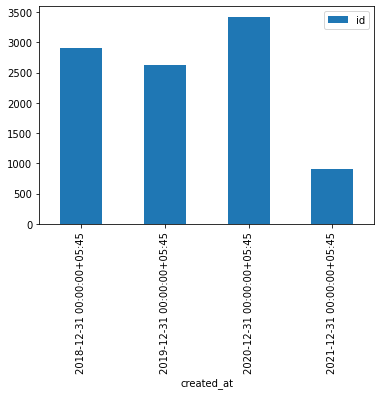

In [10]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [11]:
df=df[df.urls!="[]"]

In [12]:
df = df.drop_duplicates(['urls'], keep="last")

In [13]:
df

,id,created_at,urls
0,1377022218178154498,2021-03-31 04:02:35+05:45,['https://english.onlinekhabar.com/mithila-hou...
1,1376853071083413505,2021-03-30 16:50:27+05:45,['https://english.onlinekhabar.com/uml-feud-ne...
2,1376844319739371521,2021-03-30 16:15:41+05:45,['https://english.onlinekhabar.com/bara-sexage...
3,1376839101039607808,2021-03-30 15:54:56+05:45,['https://english.onlinekhabar.com/nepal-covid...
4,1376835218607198211,2021-03-30 15:39:31+05:45,['https://english.onlinekhabar.com/78-business...
...,...,...,...
9872,947717363159277568,2018-01-01 12:18:21+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9873,947707925392343041,2018-01-01 11:40:51+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9874,947707659226148865,2018-01-01 11:39:48+05:45,['http://english.onlinekhabar.com/2018/01/01/4...
9875,947692790204440579,2018-01-01 10:40:43+05:45,['http://english.onlinekhabar.com/2018/01/01/4...


In [14]:
df['article'] = None

In [15]:
def urlstourl(urls):
    return ast.literal_eval(urls)[0]

df['urls'] = df.urls.progress_apply(urlstourl)

In [16]:
df

,id,created_at,urls,article
0,1377022218178154498,2021-03-31 04:02:35+05:45,https://english.onlinekhabar.com/mithila-house...,None
1,1376853071083413505,2021-03-30 16:50:27+05:45,https://english.onlinekhabar.com/uml-feud-nepa...,None
2,1376844319739371521,2021-03-30 16:15:41+05:45,https://english.onlinekhabar.com/bara-sexagena...,None
3,1376839101039607808,2021-03-30 15:54:56+05:45,https://english.onlinekhabar.com/nepal-covid-1...,None
4,1376835218607198211,2021-03-30 15:39:31+05:45,https://english.onlinekhabar.com/78-businesses...,None
...,...,...,...,...
9872,947717363159277568,2018-01-01 12:18:21+05:45,http://english.onlinekhabar.com/2018/01/01/411...,None
9873,947707925392343041,2018-01-01 11:40:51+05:45,http://english.onlinekhabar.com/2018/01/01/411...,None
9874,947707659226148865,2018-01-01 11:39:48+05:45,http://english.onlinekhabar.com/2018/01/01/411...,None
9875,947692790204440579,2018-01-01 10:40:43+05:45,http://english.onlinekhabar.com/2018/01/01/411...,None


In [17]:
df.to_csv(file_path, index=False)

## Chunk

In [18]:
def article_ktmpost(url):
    try:
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        result = soup.find("div", {"class": "col-sm-8"})
        return result.text
    except Exception as e:
        print (str(e))
        return 404
    
def article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print (str(e))
        return 404        

In [19]:
pd.read_csv(file_path, nrows=1).head(0).to_csv(result_file_path)
dataframe = pd.read_csv(file_path, iterator=True, chunksize=500)

for chunk in dataframe:
   chunk['article'] = chunk['urls'].progress_apply(article)
   chunk.to_csv(result_file_path, mode='a', header=None)

Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Read timed out. (read timeout=7) on URL https://english.onlinekhabar.com/new-e-commerce-law-in-nepal-key-provisions.html
Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Read timed out. (read timeout=7) on URL https://english.onlinekhabar.com/dhanusha-dad-uncles-arrested-on-the-charge-of-kidnapping-7-year-old-kid.html
Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Read timed out. (read timeout=7) on URL https://english.onlinekhabar.com/bird-flu-is-back-to-kathmandu.html



Article `download()` failed with ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')) on URL https://english.onlinekhabar.com/disability-inclusive-drr-guideline-mobile-app-in-the-offing.html
Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Max retries exceeded with url: /nepal-covid-19-tally-2440-new-cases-1133-recoveries-19-deaths-in-24-hours.html (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f8aac14c490>, 'Connection to english.onlinekhabar.com timed out. (connect timeout=7)')) on URL https://english.onlinekhabar.com/nepal-covid-19-tally-2440-new-cases-1133-recoveries-19-deaths-in-24-hours.html
Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Read timed out. on URL https://english.onlinekhabar.com/nepali-congress-lawmakers-vandalise-province-5-assembly-furniture.html
Article `download()` failed with HTTPSConnectionPool(host='englis

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/growing-amount-of-arrests-mocks-govts-prosperous-nepal-happy-nepali-goal.html on URL https://english.onlinekhabar.com/growing-amount-of-arrests-mocks-govts-prosperous-nepal-happy-nepali-goal.html



Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/nepal-lockdown-urgent-need-to-address-needs-of-poor-and-vulnerable-families on URL https://english.onlinekhabar.com/nepal-lockdown-urgent-need-to-address-needs-of-poor-and-vulnerable-families



Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/nepal-on-complete-lockdown-govt-bars-citizens-from-leaving-houses.htmls on URL https://english.onlinekhabar.com/nepal-on-complete-lockdown-govt-bars-citizens-from-leaving-houses.htmls



Article `download()` failed with HTTPSConnectionPool(host='english.onlinekhabar.com', port=443): Read timed out. (read timeout=7) on URL https://english.onlinekhabar.com/morning-starter-thursday-december-12-2019.html



Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/lingden-people-who-threatened-to-kill-me-are-linked-to-jhapa-po on URL http://english.onlinekhabar.com/lingden-people-who-threatened-to-kill-me-are-linked-to-jhapa-po



Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/414358-2/#.WqKMuRwaJtk.twitter on URL http://english.onlinekhabar.com/414358-2/#.WqKMuRwaJtk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/nepal-vs-afghanistan-five-mini-contests-that-will-determine-the-outcome-of-the-match/#.WqJQV-a3WkM.twitter on URL http://english.onlinekhabar.com/nepal-vs-afghanistan-five-mini-contests-that-will-determine-the-outcome-of-the-match/#.WqJQV-a3WkM.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/finance-minister-khatiwada-is-now-member-of-parliament/#.WqIwl3LYpdE.twitter on URL http://english.onlinekhabar.com/finance-minister-khatiwada-is-now-member-of-parliament/#.WqIwl3LYpdE.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/election-for-speaker-maoist-centre-names-

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/terai-fast-track-nepali-army-signs-deals-with-eight-contractors-14-more-to-be-deployed/#.Wpzua-dRVqk.twitter on URL http://english.onlinekhabar.com/terai-fast-track-nepali-army-signs-deals-with-eight-contractors-14-more-to-be-deployed/#.Wpzua-dRVqk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/oli-to-expand-cabinet-only-after-presidential-election/#.WpznOe6c8Lo.twitter on URL http://english.onlinekhabar.com/oli-to-expand-cabinet-only-after-presidential-election/#.WpznOe6c8Lo.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/blog-a-filmphobics-confession-why-travelling-is-the-best-to-challenge-your-inhibitions/#.WpzRJp2DkDo.twitter on URL http://english.onlinekhabar.com/blog-a-filmphobics-confession-why-travelling-is-the-best-to-challenge-your-inhibitions/#.WpzR

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/28/413928.html#.WpY741opWSk.twitter on URL http://english.onlinekhabar.com/2018/02/28/413928.html#.WpY741opWSk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/28/413926.html#.WpY0itbc4QA.twitter on URL http://english.onlinekhabar.com/2018/02/28/413926.html#.WpY0itbc4QA.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/28/413924.html#.WpYu0Ez7KgQ.twitter on URL http://english.onlinekhabar.com/2018/02/28/413924.html#.WpYu0Ez7KgQ.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/27/413921.html#.WpU_d7ASVM4.twitter on URL http://english.onlinekhabar.com/2018/02/27/413921.html#.WpU_d7ASVM4.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/23/413754.html#.Wo_PVqBetBI.twitter on URL http://english.onlinekhabar.com/2018/02/23/413754.html#.Wo_PVqBetBI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/23/413772.html#.Wo-5RmlgDPI.twitter on URL http://english.onlinekhabar.com/2018/02/23/413772.html#.Wo-5RmlgDPI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/23/413757.html#.Wo-wf0Iq3CQ.twitter on URL http://english.onlinekhabar.com/2018/02/23/413757.html#.Wo-wf0Iq3CQ.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/23/413754.html#.Wo-mf6-rMwE.twitter on URL http://english.onlinekhabar.com/2018/02/23/413754.html#.Wo-mf6-rMwE.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/20/413609.html#.WovDK4nW0Ks.twitter on URL http://english.onlinekhabar.com/2018/02/20/413609.html#.WovDK4nW0Ks.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/20/413591.html#.WouylvPxeuY.twitter on URL http://english.onlinekhabar.com/2018/02/20/413591.html#.WouylvPxeuY.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/20/413605.html#.Wousle2v11k.twitter on URL http://english.onlinekhabar.com/2018/02/20/413605.html#.Wousle2v11k.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/20/413601.html#.WouoTjQ23Fg.twitter on URL http://english.onlinekhabar.com/2018/02/20/413601.html#.WouoTjQ23Fg.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/15/413400.html on URL http://english.onlinekhabar.com/2018/02/15/413400.html
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/15/413400.html#.WoUUjv3NsEA.twitter on URL http://english.onlinekhabar.com/2018/02/15/413400.html#.WoUUjv3NsEA.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/15/413396.html#.WoUPfFhaxJw.twitter on URL http://english.onlinekhabar.com/2018/02/15/413396.html#.WoUPfFhaxJw.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/15/413393.html#.WoUKu_S_upM.twitter on URL http://english.onlinekhabar.com/2018/02/15/413393.html#.WoUKu_S_upM.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/14/413387.h

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/12/413230.html#.WoEud1iVJgU.twitter on URL http://english.onlinekhabar.com/2018/02/12/413230.html#.WoEud1iVJgU.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/12/413226.html#.WoErtiVLL2g.twitter on URL http://english.onlinekhabar.com/2018/02/12/413226.html#.WoErtiVLL2g.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/12/413223.html#.WoEjSxxBKvs.twitter on URL http://english.onlinekhabar.com/2018/02/12/413223.html#.WoEjSxxBKvs.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/12/413221.html#.WoEXEiL9ngM.twitter on URL http://english.onlinekhabar.com/2018/02/12/413221.html#.WoEXEiL9ngM.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/08/413067.html#.Wnvb2vdcxjQ.twitter on URL http://english.onlinekhabar.com/2018/02/08/413067.html#.Wnvb2vdcxjQ.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/08/413062.html#.WnvNyYjsnCs.twitter on URL http://english.onlinekhabar.com/2018/02/08/413062.html#.WnvNyYjsnCs.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/07/413054.html#.WnraBtx1avA.twitter on URL http://english.onlinekhabar.com/2018/02/07/413054.html#.WnraBtx1avA.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/07/413049.html#.WnrVvJUzDAw.twitter on URL http://english.onlinekhabar.com/2018/02/07/413049.html#.WnrVvJUzDAw.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/04/412869.html#.WnaeXKYuG80.twitter on URL http://english.onlinekhabar.com/2018/02/04/412869.html#.WnaeXKYuG80.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/04/412856.html#.WnaZbP9-pF4.twitter on URL http://english.onlinekhabar.com/2018/02/04/412856.html#.WnaZbP9-pF4.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/04/412855.html#.WnaWhxIUaYU.twitter on URL http://english.onlinekhabar.com/2018/02/04/412855.html#.WnaWhxIUaYU.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/02/04/412852.html#.WnaMn3O8TGI.twitter on URL http://english.onlinekhabar.com/2018/02/04/412852.html#.WnaMn3O8TGI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/31/412682.html#.WnFBFiCda8Q.twitter on URL http://english.onlinekhabar.com/2018/01/31/412682.html#.WnFBFiCda8Q.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/30/412674.html#.WnBTW3GZuKU.twitter on URL http://english.onlinekhabar.com/2018/01/30/412674.html#.WnBTW3GZuKU.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/30/412672.html#.WnBQ60qHZ0Q.twitter on URL http://english.onlinekhabar.com/2018/01/30/412672.html#.WnBQ60qHZ0Q.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/30/412670.html#.WnBIviNIcRs.twitter on URL http://english.onlinekhabar.com/2018/01/30/412670.html#.WnBIviNIcRs.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2017/07/04/402908.html#.Wmr4hRfKtWY.twitter on URL http://english.onlinekhabar.com/2017/07/04/402908.html#.Wmr4hRfKtWY.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/26/412519.html#.WmrJeEfplpw.twitter on URL http://english.onlinekhabar.com/2018/01/26/412519.html#.WmrJeEfplpw.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/26/412513.html#.WmrAI7deuW4.twitter on URL http://english.onlinekhabar.com/2018/01/26/412513.html#.WmrAI7deuW4.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/26/412498.html#.Wmq5ZKYfbm8.twitter on URL http://english.onlinekhabar.com/2018/01/26/412498.html#.Wmq5ZKYfbm8.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/23/412325.html#.Wma1yeC7X9M.twitter on URL http://english.onlinekhabar.com/2018/01/23/412325.html#.Wma1yeC7X9M.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/22/412321.html#.WmXOj2iOVgk.twitter on URL http://english.onlinekhabar.com/2018/01/22/412321.html#.WmXOj2iOVgk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/22/412319.html#.WmXMZLxf3ME.twitter on URL http://english.onlinekhabar.com/2018/01/22/412319.html#.WmXMZLxf3ME.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/22/412315.html#.WmXJ_hcKv3s.twitter on URL http://english.onlinekhabar.com/2018/01/22/412315.html#.WmXJ_hcKv3s.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/21/412242.html#.WmQd6-ogqE0.twitter on URL http://english.onlinekhabar.com/2018/01/21/412242.html#.WmQd6-ogqE0.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/21/412209.html#.WmQXksex8uk.twitter on URL http://english.onlinekhabar.com/2018/01/21/412209.html#.WmQXksex8uk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/21/412235.html#.WmQUKeBre8A.twitter on URL http://english.onlinekhabar.com/2018/01/21/412235.html#.WmQUKeBre8A.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/19/412230.html#.WmHP955nqWY.twitter on URL http://english.onlinekhabar.com/2018/01/19/412230.html#.WmHP955nqWY.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/16/412056.html#.Wl288cMrtDo.twitter on URL http://english.onlinekhabar.com/2018/01/16/412056.html#.Wl288cMrtDo.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/16/412038.html#.Wl2mBPpp0hA.twitter on URL http://english.onlinekhabar.com/2018/01/16/412038.html#.Wl2mBPpp0hA.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/16/412045.html#.Wl2bEGIQ0ds.twitter on URL http://english.onlinekhabar.com/2018/01/16/412045.html#.Wl2bEGIQ0ds.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/16/412034.html#.Wl2AiiXSiiU.twitter on URL http://english.onlinekhabar.com/2018/01/16/412034.html#.Wl2AiiXSiiU.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/11/411887.html#.WlcmhSjRtiw.twitter on URL http://english.onlinekhabar.com/2018/01/11/411887.html#.WlcmhSjRtiw.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/11/411884.html#.WlcKedVd668.twitter on URL http://english.onlinekhabar.com/2018/01/11/411884.html#.WlcKedVd668.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/11/411880.html#.Wlb-zyUiMTE.twitter on URL http://english.onlinekhabar.com/2018/01/11/411880.html#.Wlb-zyUiMTE.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/11/411878.html#.Wlb3sHo_TFI.twitter on URL http://english.onlinekhabar.com/2018/01/11/411878.html#.Wlb3sHo_TFI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/08/411723.html#.WlMJ4cETGLE.twitter on URL http://english.onlinekhabar.com/2018/01/08/411723.html#.WlMJ4cETGLE.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/08/411720.html#.WlMBiUH8ZVM.twitter on URL http://english.onlinekhabar.com/2018/01/08/411720.html#.WlMBiUH8ZVM.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/08/411717.html#.WlMBN3JiNu4.twitter on URL http://english.onlinekhabar.com/2018/01/08/411717.html#.WlMBN3JiNu4.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/08/411712.html#.WlLt53U3AnI.twitter on URL http://english.onlinekhabar.com/2018/01/08/411712.html#.WlLt53U3AnI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/03/411571.html#.Wky23GdD7fc.twitter on URL http://english.onlinekhabar.com/2018/01/03/411571.html#.Wky23GdD7fc.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/03/411563.html#.WkyncompUYI.twitter on URL http://english.onlinekhabar.com/2018/01/03/411563.html#.WkyncompUYI.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/03/411566.html#.WkynEP-b2rg.twitter on URL http://english.onlinekhabar.com/2018/01/03/411566.html#.WkynEP-b2rg.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://english.onlinekhabar.com/2018/01/03/411560.html#.WkydFUVfNvc.twitter on URL http://english.onlinekhabar.com/2018/01/03/411560.html#.WkydFUVfNvc.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://en

In [20]:
df_ = pd.read_csv(result_file_path)

In [24]:
df_[df_.article!='404']

,Unnamed: 0,id,created_at,urls,article
0,0,1377022218178154498,2021-03-31 04:02:35+05:45,https://english.onlinekhabar.com/mithila-house...,"When people talk about Ramayana, one of the gr..."
1,1,1376853071083413505,2021-03-30 16:50:27+05:45,https://english.onlinekhabar.com/uml-feud-nepa...,"Kathmandu, March 30\n\nThe faction of the ruli..."
2,2,1376844319739371521,2021-03-30 16:15:41+05:45,https://english.onlinekhabar.com/bara-sexagena...,"Birgunj, March 30\n\nA 65-year-old woman died ..."
3,3,1376839101039607808,2021-03-30 15:54:56+05:45,https://english.onlinekhabar.com/nepal-covid-1...,"Kathmandu, March 29\n\nThe Ministry of Health ..."
4,4,1376835218607198211,2021-03-30 15:39:31+05:45,https://english.onlinekhabar.com/78-businesses...,"Kathmandu, March 30\n\nThe Department of Food ..."
...,...,...,...,...,...
9091,9091,972791011457032193,2018-03-11 16:52:05+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe Mayor of a town in ..."
9092,9092,972785320977752065,2018-03-11 16:29:28+05:45,http://english.onlinekhabar.com/province-5-chi...,"Kathmandu, March 11\n\nProvince 5 Chief Minist..."
9093,9093,972770673549627392,2018-03-11 15:31:16+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe policemen who relea..."
9094,9094,972760525049335808,2018-03-11 14:50:56+05:45,http://english.onlinekhabar.com/icc-world-cup-...,Watching Nepal play in the World Cup is every ...


In [26]:
# did not have to continue in this case
df_[df_.article!='404'][['id', 'created_at', 'urls', 'article']].to_csv(file_path, index=False)